<center> <h1> <i>Computer Vision</h1>
</center>

 Work by :
<li> Yassine Hamzaoui </h3>

<h2>Introduction : </h2>

Convolutional Neural Networks (CNNs) are a class of deep learning models that have proven exceptionally effective for processing and analyzing visual data. Unlike traditional neural networks, CNNs utilize filters, also known as kernels, which slide over the input data to capture spatial hierarchies and local patterns. These filters enable the network to automatically learn features such as edges, textures, and more complex structures at different layers, making CNNs particularly adept at handling image data. 

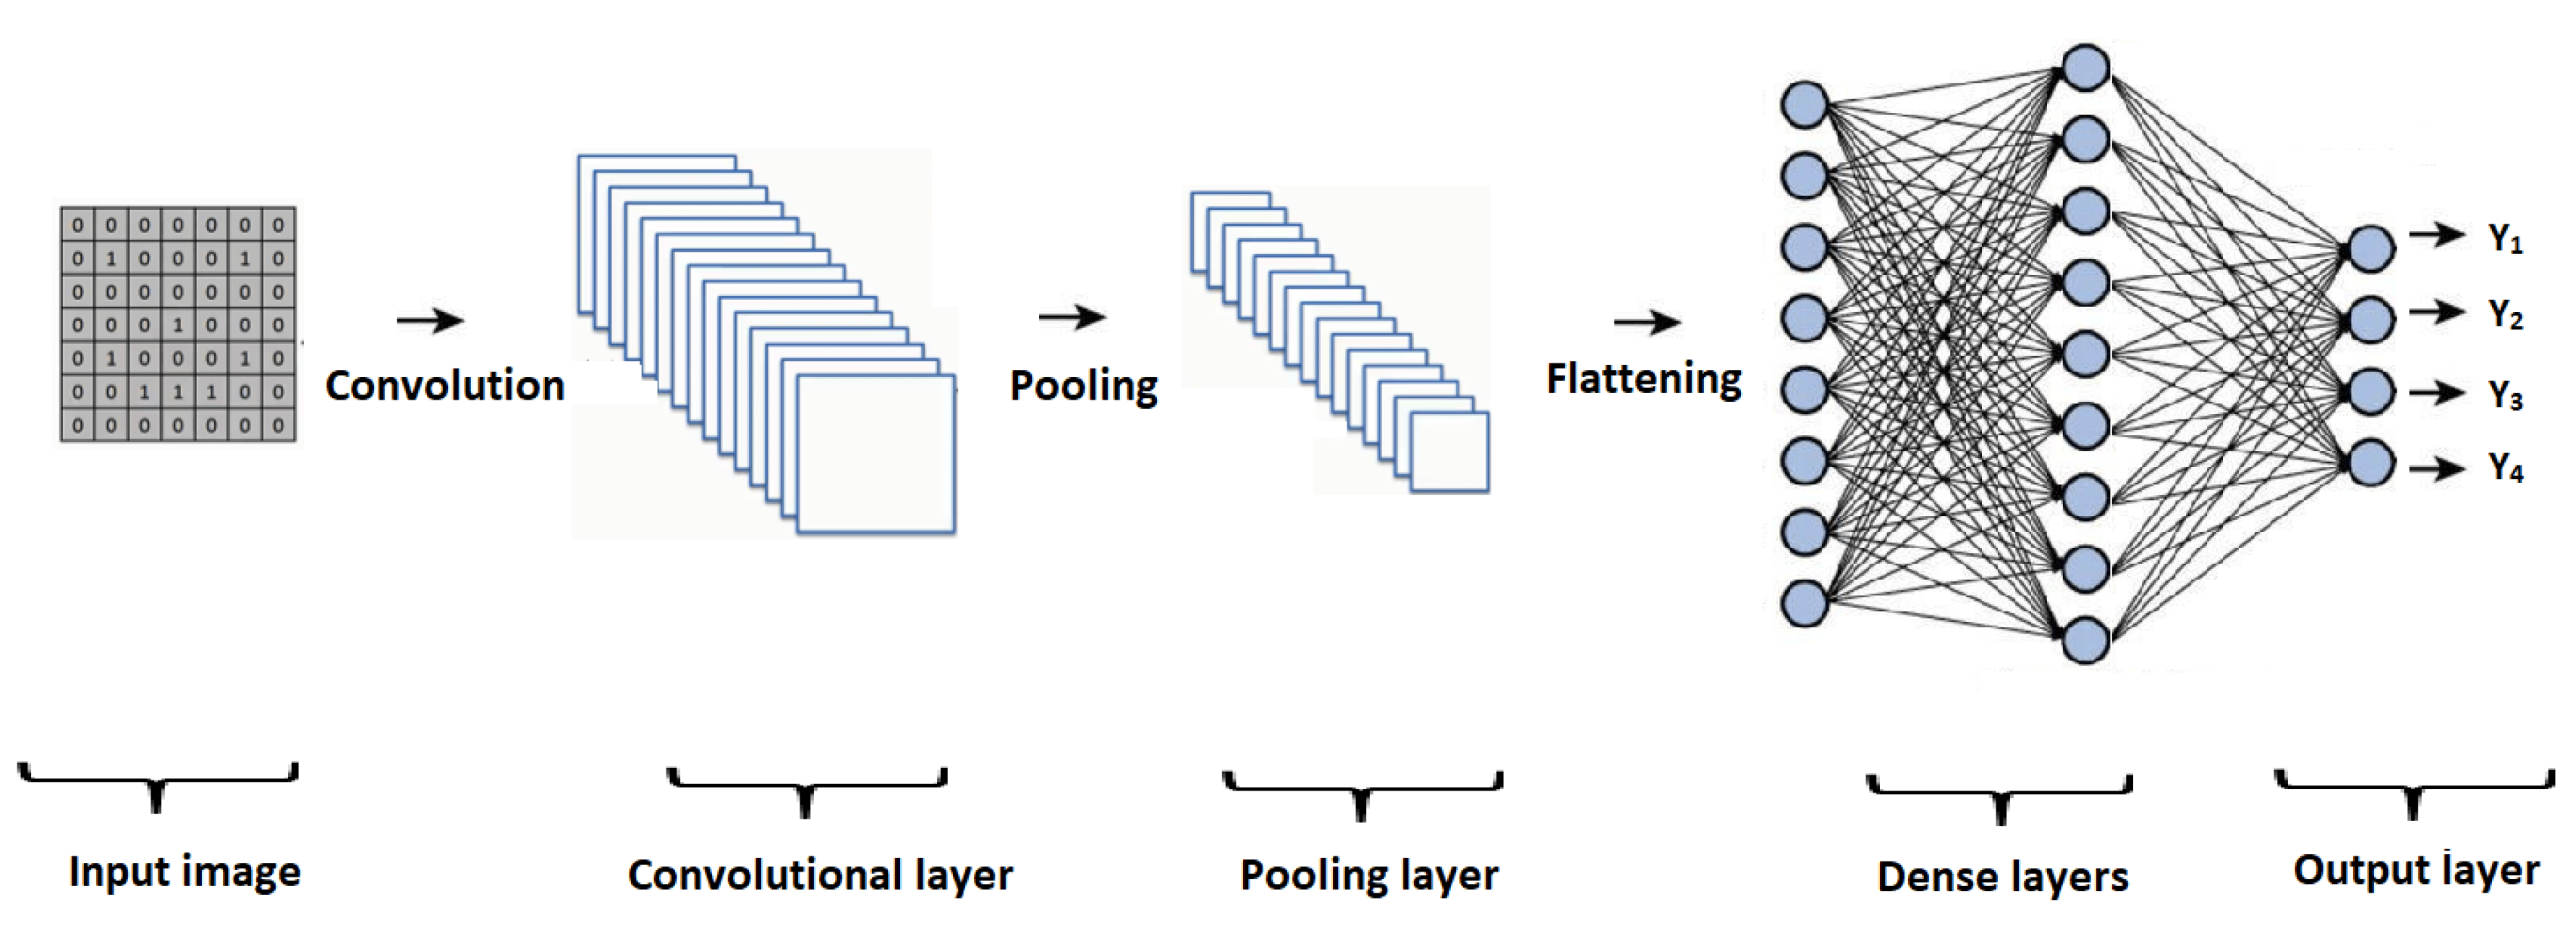

The CIFAR-10 dataset, a benchmark in machine learning, consists of 60,000 32x32 color images across 10 classes, such as airplanes, cars, and birds. Due to the dataset's diversity and size, it provides an excellent platform for training and evaluating CNNs.

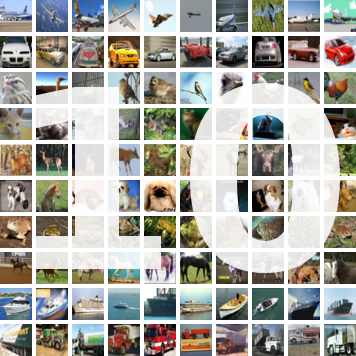

The goal of this homework is to train a Convolutional Neural Network (CNN) to perform a classification task on the CIFAR-10 dataset. The classification involves categorizing objects in the CIFAR-10 dataset into two groups:

<li>Can fly (class 1): grouping objects that can fly, such as birds and airplanes.</li>
<li>Cannot fly (class 0): grouping objects that cannot fly, such as frogs, deer, trucks, etc.</li>

In this work, we will see the difference in terms of performance between traditional neural networks and CNNs, highlighting the superior capability of CNNs in handling complex image data. The CIFAR-10 dataset provides an excellent platform for this comparison due to its diversity and size, making it ideal for training and evaluating CNNs. By using filters, CNNs can efficiently extract meaningful features from CIFAR-10 images, leading to higher performance in image classification tasks and demonstrating their effectiveness over traditional neural networks.

After training, we'll assess the model's performance using a separate testing set. We'll calculate precision, recall, F1 score, and accuracy to gauge its effectiveness in classification tasks. Additionally, we'll generate a confusion matrix to visualize the model's predictions against actual labels, providing insights into its classification behavior.

<h2> Convolutional Neural Network Classification of CIFAR10 Dataset into Two Categories :</h2>

<h4><u>Important libraries :</h4>

In [37]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np
from tabulate import tabulate

%matplotlib inline

<h4><u>Dataset importation :</h4>

In [38]:
tf.keras.backend.image_data_format = 'channels_last'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

<h4><u>Image norm.</h4>

In [ ]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0


<h4><u>Visualisations of images and their new labels + class balancing :</h4>

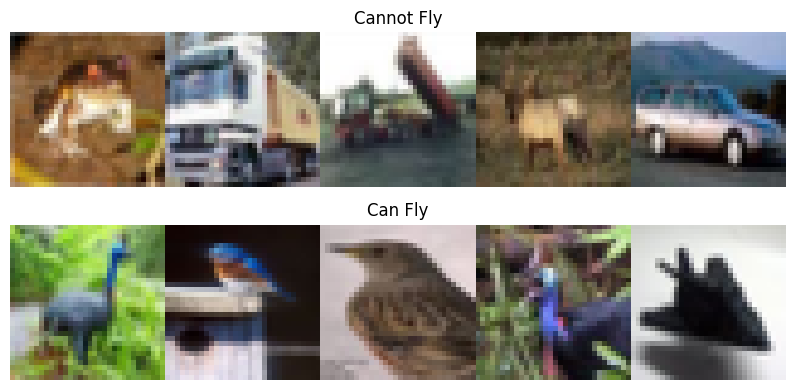


Training set distribution:
-------------------------
Class Cannot Fly: 10000 samples
Class Can Fly: 10000 samples

Original training distribution:
Class Cannot Fly: 40000 samples
Class Can Fly: 10000 samples

Test set distribution:
-------------------------
Class Cannot Fly: 2000 samples
Class Can Fly: 2000 samples

Original test distribution:
Class Cannot Fly: 8000 samples
Class Can Fly: 2000 samples

Final shapes:
-------------------------
X train balanced: (20000, 32, 32, 3)
y train balanced: (20000,)
X test balanced: (4000, 32, 32, 3)
y test balanced: (4000,)


In [39]:

# Define CIFAR-10 labels and binary mapping (can fly vs cannot fly)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
binary_labels = {0: 'Cannot Fly', 1: 'Can Fly'}
can_fly = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# Convert to binary labels
y_train_binary = can_fly[y_train.flatten()].reshape(y_train.shape)
y_test_binary = can_fly[y_test.flatten()].reshape(y_test.shape)

# Plot examples of each class
plt.figure(figsize=(10, 4))
for i in range(2):
    # Find indices for current class
    idx = np.where(y_train_binary.flatten() == i)[0][:5]
    
    # Create horizontal stack of images
    imgs = np.hstack(x_train[idx])
    
    plt.subplot(2, 1, i + 1)
    plt.imshow(imgs)
    plt.title(binary_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Balance the training data
np.random.seed(42)  # for reproducibility

fly_idx = np.where(y_train_binary.flatten() == 1)[0]
no_fly_idx = np.where(y_train_binary.flatten() == 0)[0]

min_size = len(fly_idx)
no_fly_idx_balanced = np.random.choice(no_fly_idx, min_size, replace=False)

# Combine indices and create balanced training set
balanced_idx = np.concatenate([fly_idx, no_fly_idx_balanced])
x_train_balanced = x_train[balanced_idx]
y_train_balanced = y_train_binary.flatten()[balanced_idx]

# Balance the test data
fly_idx_test = np.where(y_test_binary.flatten() == 1)[0]
no_fly_idx_test = np.where(y_test_binary.flatten() == 0)[0]

min_size_test = len(fly_idx_test)
no_fly_idx_test_balanced = np.random.choice(no_fly_idx_test, min_size_test, replace=False)

balanced_idx_test = np.concatenate([fly_idx_test, no_fly_idx_test_balanced])
x_test_balanced = x_test[balanced_idx_test]
y_test_balanced = y_test_binary.flatten()[balanced_idx_test]

print("\nTraining set distribution:")
print("-" * 25)
unique, counts = np.unique(y_train_balanced, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Class {binary_labels[label]}: {count} samples")

print("\nOriginal training distribution:")
orig_unique, orig_counts = np.unique(y_train_binary, return_counts=True)
for label, count in zip(orig_unique, orig_counts):
    print(f"Class {binary_labels[label]}: {count} samples")

print("\nTest set distribution:")
print("-" * 25)
unique_test, counts_test = np.unique(y_test_balanced, return_counts=True)
for label, count in zip(unique_test, counts_test):
    print(f"Class {binary_labels[label]}: {count} samples")

print("\nOriginal test distribution:")
orig_unique_test, orig_counts_test = np.unique(y_test_binary, return_counts=True)
for label, count in zip(orig_unique_test, orig_counts_test):
    print(f"Class {binary_labels[label]}: {count} samples")

print("\nFinal shapes:")
print("-" * 25)
print(f"X train balanced: {x_train_balanced.shape}")
print(f"y train balanced: {y_train_balanced.shape}")
print(f"X test balanced: {x_test_balanced.shape}")
print(f"y test balanced: {y_test_balanced.shape}")

<h4><u> Training a Multi-Layer Perceptron for Image Classification (NOT CNN) :</h4>

Initially, we commenced training with a traditional neural network architecture devoid of any filters, aiming to establish a baseline performance before transitioning to a convolutional neural network (CNN). 

 Throughout this initial phase, the neural network will undergo iterative training epochs, processing batches of data, updating its parameters, and assessing its performance on both the training and validation datasets. This traditional neural network, lacking the ability to extract spatial features through convolutional filters will serve as a starting point to gauge the effectiveness and improvement achieved by CNNs. 

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = x_train[0].shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid'),
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,481 (3.07 MB)

 Trainable params: 803,841 (3.07 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6228 - loss: 0.6747 - val_accuracy: 0.8445 - val_loss: 0.4745
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6899 - loss: 0.5870 - val_accuracy: 0.8242 - val_loss: 0.4844
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7130 - loss: 0.5570 - val_accuracy: 0.6637 - val_loss: 0.6413
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7225 - loss: 0.5422 - val_accuracy: 0.6125 - val_loss: 0.6749
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7269 - loss: 0.5303 - val_accuracy: 0.7017 - val_loss: 0.5999
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7360 - loss: 0.5336 - val_accuracy: 0.7897 - val_loss: 0.5043
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7321 - loss: 0.5333 - val_accuracy: 0.6840 - val_loss: 0.6042
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7404 - loss: 0.5243 - val_accuracy: 0.

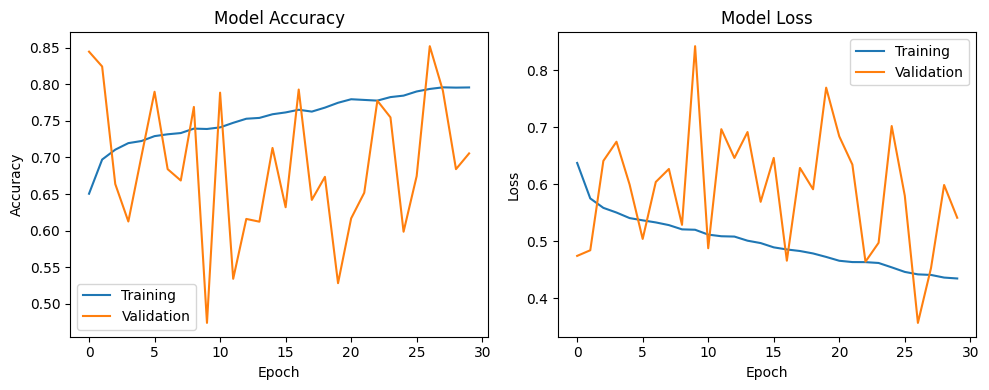


Test Accuracy: 0.7168
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step



Classification Report:
              precision    recall  f1-score   support

  Cannot Fly       0.72      0.70      0.71      2000
     Can Fly       0.71      0.73      0.72      2000

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [41]:
history = model.fit(
    x_train_balanced,
    y_train_balanced,
    batch_size=32,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test_balanced, y_test_balanced, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

y_pred = model.predict(x_test_balanced)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test_balanced, y_pred_binary, 
                          target_names=['Cannot Fly', 'Can Fly']))

# Save the model
model.save('simple_cnn_model.h5')

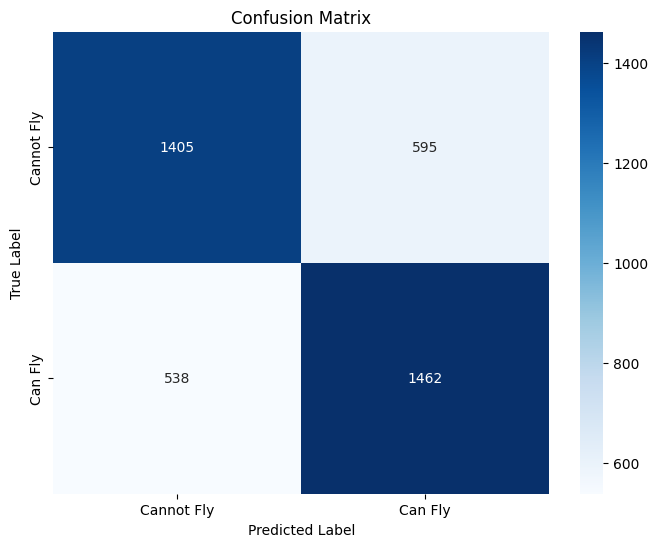

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_balanced, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cannot Fly', 'Can Fly'],
            yticklabels=['Cannot Fly', 'Can Fly'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create the CNN model2
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train_balanced[0].shape),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

# Compile model
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model2.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,393 (310.13 KB)

 Trainable params: 79,169 (309.25 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6458 - loss: 0.6441 - val_accuracy: 0.2000 - val_loss: 1.3432
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7395 - loss: 0.5267 - val_accuracy: 0.6467 - val_loss: 0.6670
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7579 - loss: 0.4966 - val_accuracy: 0.7337 - val_loss: 0.5441
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7794 - loss: 0.4705 - val_accuracy: 0.6785 - val_loss: 0.6180
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7798 - loss: 0.4613 - val_accuracy: 0.6300 - val_loss: 0.6744
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7906 - loss: 0.4511 - val_accuracy: 0.6995 - val_loss: 0.5831
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7945 - loss: 0.4395 - val_accuracy: 0.8895 - val_loss: 0.3188
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7991 - loss: 0.4271 - val_accuracy: 0.

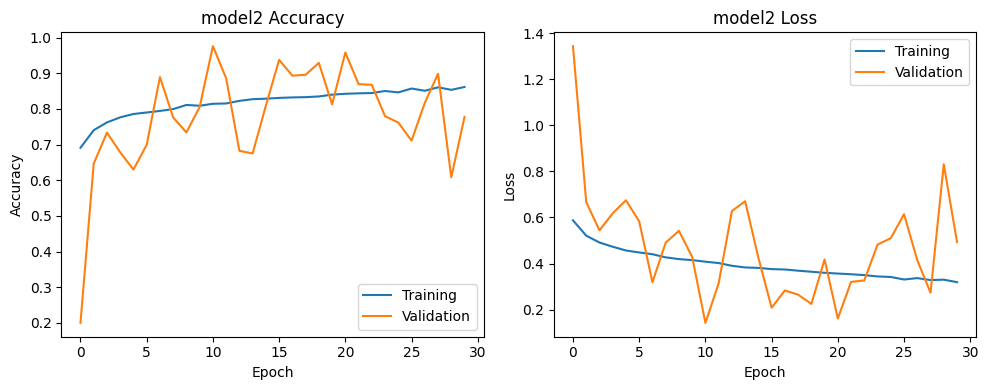


Test Accuracy: 0.8265
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

  Cannot Fly       0.87      0.77      0.82      2000
     Can Fly       0.79      0.88      0.84      2000

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



In [44]:
# Train model2
history = model2.fit(
    x_train_balanced,
    y_train_balanced,
    batch_size=32,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('model2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('model2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss, test_accuracy = model2.evaluate(x_test_balanced, y_test_balanced, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Make predictions and print classification report
y_pred = model2.predict(x_test_balanced)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test_balanced, y_pred_binary, 
                          target_names=['Cannot Fly', 'Can Fly']))





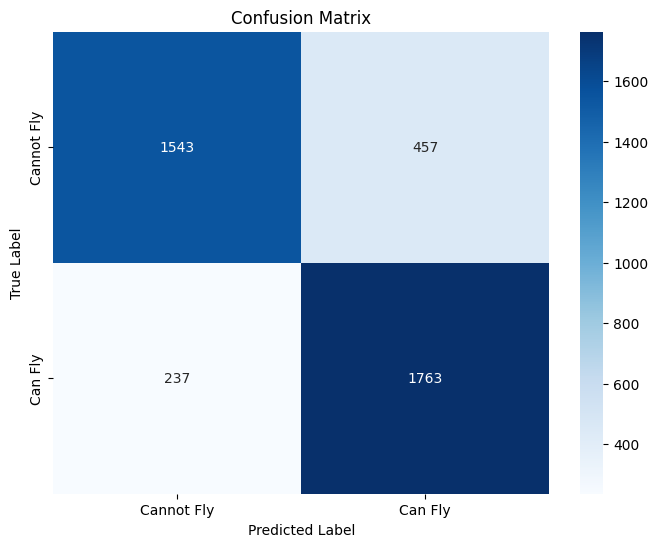

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_balanced, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cannot Fly', 'Can Fly'],
            yticklabels=['Cannot Fly', 'Can Fly'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The model CNN represents a convolutional neural network architecture tailored for image classification tasks. Unlike the previous model, MLP, which relied solely on densely connected layers, CNN integrates convolutional layers, enabling it to extract spatial hierarchies of features from the input images. By incorporating 16 and 32 filters in its initial convolutional layers, followed by activation functions, batch normalization, and max-pooling operations, the model progressively learns hierarchical representations of the input data. This architecture facilitates feature extraction and dimensionality reduction, leading to more efficient and effective classification. Moreover, CNN employs techniques like dropout regularization to mitigate overfitting and improve generalization performance. Despite having fewer parameters compared to MLP, CNN leverages the power of convolutional operations to potentially achieve superior classification accuracy and robustness in handling image data.

<h2>Conclusion : (CNN less params and better performance)</h2>


In conclusion, the transition from a traditional neural network to a convolutional neural network (CNN) architecture significantly enhanced the performance of the classification task focused on determining whether an object can fly or not. CNNs proved to be exceptionally adept at analyzing visual data, leveraging their ability to capture spatial hierarchies of features to discern intricate patterns indicative of flight, such as wing structures and aerodynamic characteristics. The spatial awareness and feature extraction capabilities of CNNs, coupled with their parameter efficiency, enabled them to learn discriminative features from large-scale datasets without overfitting, ultimately leading to superior accuracy in classification compared to traditional neural networks. 